In [1]:
from tensorflow.keras import layers, models, backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
base_path = './input/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

train_flow.class_indices

Found 8410 images belonging to 2 classes.
Found 3587 images belonging to 2 classes.
Found 7207 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [3]:
model = models.Sequential()

model.add(
    layers.Conv2D(32, (3, 3),activation='relu', input_shape=(224, 224, 3))
)

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [4]:
train_steps = 10000//64
valid_steps = 20000//64

hist = model.fit(
    train_flow,
    epochs=3,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

Epoch 1/3
132/132 [==============================] - 893s 7s/step - loss: 0.6847 - accuracy: 0.5732 - val_loss: 0.6871 - val_accuracy: 0.5561
Epoch 2/3
132/132 [==============================] - 862s 7s/step - loss: 0.6821 - accuracy: 0.5755
Epoch 3/3
132/132 [==============================] - 634s 5s/step - loss: 0.6822 - accuracy: 0.5754


In [5]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

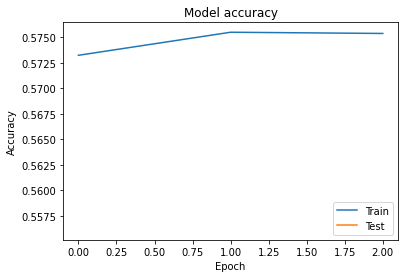

In [11]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

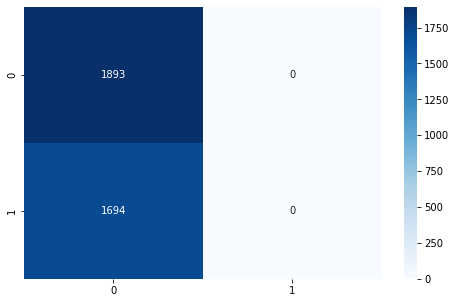

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

In [13]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.4935593508925882
AP Score: 0.4716646658534439
